В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
np.set_printoptions(legacy='1.25')

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [3]:
cars_df = pd.read_csv('cars.csv')
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [4]:
cars_df.dtypes

,0
Car_ID,int64
Brand,object
Model,object
Year,int64
Kilometers_Driven,int64
Fuel_Type,object
Transmission,object
Owner_Type,object
Mileage,int64
Engine,int64


In [5]:
numeric_columns_sum = (cars_df.dtypes == 'int64').sum()
object_columns_sum = (cars_df.dtypes == 'object').sum()

print(f'Number of numerical columns: {numeric_columns_sum}')
print(f'Number of categorical columns: {object_columns_sum}')

Number of numerical columns: 8
Number of categorical columns: 5


In [6]:
for col in cars_df.select_dtypes(include='object'):
  print(f'{col}: {cars_df[col].nunique()}')

Brand: 11
Model: 58
Fuel_Type: 2
Transmission: 2
Owner_Type: 3


In [7]:
cars_df.Brand.unique()

array(['Toyota', 'Honda', 'Ford', 'Maruti', 'Hyundai', 'Tata', 'Mahindra',
       'Volkswagen', 'Audi', 'BMW', 'Mercedes'], dtype=object)

In [8]:
cars_df.Model.unique()

array(['Corolla', 'Civic', 'Mustang', 'Swift', 'Sonata', 'Nexon',
       'Scorpio', 'Polo', 'A4', 'X1', 'C-Class', 'Endeavour', 'Creta',
       'Harrier', 'Ertiga', 'City', 'Tiguan', 'Q3', '5 Series', 'GLC',
       'Innova', 'Figo', 'Verna', 'Altroz', 'Thar', 'Passat', 'A6', 'X3',
       'E-Class', 'Fortuner', 'Aspire', 'Elantra', 'Safari', 'Vitara',
       'WR-V', 'Ameo', 'A3', '7 Series', 'GLE', 'Yaris', 'Ranger',
       'Santro', 'Tigor', 'S-Cross', 'BR-V', 'T-Roc', 'Q7', 'X5', 'GLA',
       'Camry', 'Venue', 'Tiago', 'XUV300', 'Vento', 'A5', '3 Series',
       'Innova Crysta', 'EcoSport'], dtype=object)

In [9]:
cars_df.Owner_Type.unique()

array(['First', 'Second', 'Third'], dtype=object)

В наборі даних 8 числових і 5 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення): `Fuel_type` та `Transmission`
- 2 мультикатегоріальних зі значеннями, для яких немає відношення порядку: `Brand` та `Model`
- 1 колонка `Owner_type` в якії можна встановити відношення порядку ( First<Second<Third)


**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [10]:
inputs = cars_df.drop(columns=['Car_ID', 'Price'])
targets = cars_df.Price

In [11]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=12)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 11), (20, 11), (80,), (20,))

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [13]:
X_train.Fuel_Type.value_counts()

,count
Fuel_Type,
Petrol,41
Diesel,39


In [14]:
fuel_type_codes = {'Diesel': 0, 'Petrol': 1}
X_train['Fuel_Type_Code'] = X_train.Fuel_Type.map(fuel_type_codes)

In [15]:
X_train.Transmission.value_counts()

,count
Transmission,
Automatic,49
Manual,31


In [16]:
transmission_codes = {'Manual': 0, 'Automatic': 1}
X_train['Transmission_Code'] = X_train.Transmission.map(transmission_codes)

In [17]:
X_test['Fuel_Type_Code'] = X_test.Fuel_Type.map(fuel_type_codes)
X_test['Transmission_Code'] = X_test.Transmission.map(transmission_codes)

In [18]:
brand_enc = preprocessing.OneHotEncoder()
brand_enc.fit(X_train[['Brand']])
brand_enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [19]:
brand_one_hot = brand_enc.transform(X_test[['Brand']]).toarray()
brand_one_hot

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.

In [20]:
brand_enc.categories_[0]

array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
       'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)

In [21]:
X_test[brand_enc.categories_[0]] = brand_one_hot

In [22]:
brand_one_hot_train = brand_enc.transform(X_train[['Brand']]).toarray()

In [23]:
X_train[brand_enc.categories_[0]] = brand_one_hot_train

In [24]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

In [25]:
def group_model(model):
    for group, models in model_group_map.items():
        if model in models:
            return group
    return 'Other'

In [26]:
model_group_map = {
  'Premium': ['A3', 'A5', 'A6', '3 Series', '5 Series', '7 Series', 'C-Class', 'E-Class', 'GLA', 'GLC', 'Q7', 'X3', 'X5', 'GLE'],
  'Sedan': ['Verna', 'Elantra', 'Yaris', 'Vento', 'Camry', 'Civic', 'Corolla', 'Sonata', 'Passat', 'Aspire'],
  'SUV': ['Fortuner', 'Endeavour', 'XUV300', 'Vitara', 'Harrier', 'Scorpio', 'Safari', 'S-Cross', 'BR-V', 'WR-V', 'Nexon', 'T-Roc'],
  'Hatchback': ['Tiago', 'Altroz', 'Swift', 'Santro', 'Tigor', 'Ameo', 'Venue']
}

In [27]:
X_train['Model_Grouped'] = X_train['Model'].apply(group_model)
X_test['Model_Grouped'] = X_test['Model'].apply(group_model)

Очікуваний результат після трансформацій:

In [28]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head());

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_Grouped
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,SUV
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Premium
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Premium
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Sedan
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Premium


,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_Grouped
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Other
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Hatchback
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Sedan
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Other
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Sedan


**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [29]:
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])

In [30]:
X_train_numeric

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2020,30000,23,1248,74,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
2,2017,20000,10,4951,395,4,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2018,45000,15,2179,140,7,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
27,2019,22000,18,1995,187,5,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
X_train_numeric_df = pd.concat([X_train_numeric, y_train], axis=1)

In [32]:
X_train_numeric_df.corr()['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Power,0.849137
Engine,0.710561
Transmission_Code,0.680731
BMW,0.477522
Mercedes,0.431606
Audi,0.328858
Seats,0.000979
Ford,-0.004592
Toyota,-0.023778


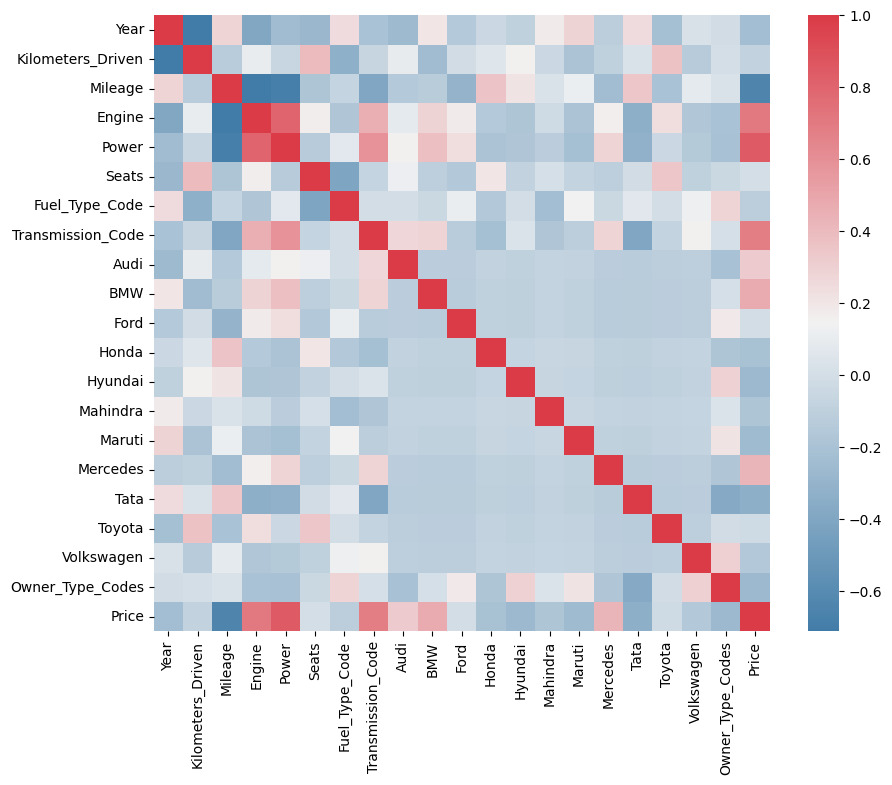

In [33]:
f, ax = plt.subplots(figsize=(10, 8))
corr = X_train_numeric_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True), square=True, ax=ax);

**Висновок**
- Позитивна кореляція:  
`Power` — 0.85: найбільший вплив  
`Engine` — 0.71: більший обʼєм двигуна — вища ціна  
`Transmission_Code` — 0.68: автоматична трансмісія — вища ціна  
- Негативна кореляція:  
`Mileage` — -0.64: чим більше авто вже прооїхало тим нижча ціна

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [34]:
X_train.select_dtypes(include='object').columns

Index(['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Model_Grouped'],
      dtype='object')

In [35]:
X_train = X_train.drop(columns=X_train.select_dtypes(include='object').columns)
X_test = X_test.drop(columns=X_test.select_dtypes(include='object').columns)

In [36]:
model = LinearRegression().fit(X_train, y_train)

In [37]:
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

In [38]:
rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))

print('RMSE train: ', rmse_train)
print('RMSE test:  ', rmse_test)

RMSE train:  210342.8016204638
RMSE test:   259601.2654272335


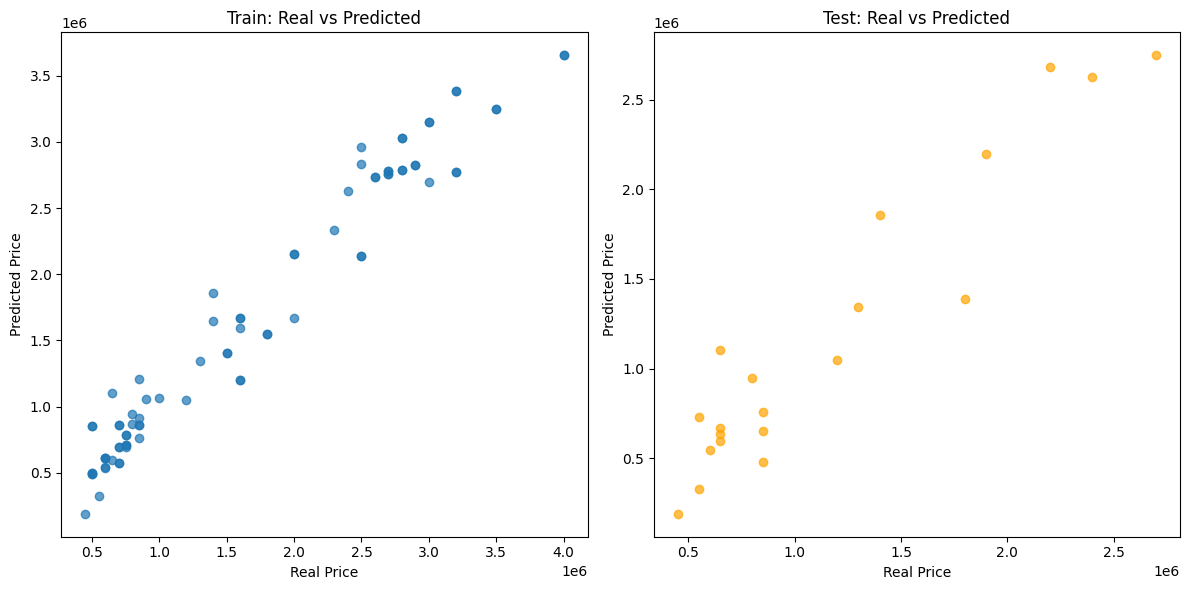

In [39]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, predictions_train, alpha=0.7)
plt.title('Train: Real vs Predicted')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')

plt.subplot(1, 2, 2)
plt.scatter(y_test, predictions_test, alpha=0.7, color='orange')
plt.title('Test: Real vs Predicted')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')

plt.tight_layout()
plt.show()

Значення `RMSE` завелике, модель неточна

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
model_scaled = LinearRegression().fit(X_train_scaled, y_train)

In [42]:
weights_df = pd.DataFrame({
    'feature': np.append(X_train.columns, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
20,1,2.252979e+07
8,Audi,7.588030e+05
15,Mercedes,7.339747e+05
9,BMW,7.303268e+05
7,Transmission_Code,2.363676e+05
17,Toyota,1.304575e+05
19,Owner_Type_Codes,6.627831e+04
4,Power,6.140756e+03
1,Kilometers_Driven,-1.087444e+01
3,Engine,-3.758587e+01


In [43]:
predictions_train_scaled = model_scaled.predict(X_train_scaled)
predictions_test_scaled = model_scaled.predict(X_test_scaled)

In [44]:
rmse_train_scaled = np.sqrt(mean_squared_error(y_train, predictions_train_scaled))
rmse_test_scaled = np.sqrt(mean_squared_error(y_test, predictions_test_scaled))

print('RMSE train: ', rmse_train_scaled)
print('RMSE test:  ', rmse_test_scaled)

RMSE train:  210342.80162046402
RMSE test:   259601.2654272351


**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [45]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

In [46]:
X_train_sm = sm.add_constant(X_train_scaled_df)

model_stats = sm.OLS(y_train, X_train_sm).fit()

In [47]:
model_stats.params

,0
const,1.680000e+06
Year,-1.160426e+04
Kilometers_Driven,-9.971396e+04
Mileage,-1.318846e+05
Engine,-2.468308e+04
Power,5.000005e+05
Seats,-1.744049e+03
Fuel_Type_Code,-1.852458e+05
Transmission_Code,1.151534e+05
Audi,2.061231e+05


In [48]:
model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     73.14
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           2.34e-34
Time:                        07:02:15   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2228.
Df Residuals:                      60   BIC:                             2276.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.72e+04     61.867      0.000    1.63e+06    1.73e+06
Year               -1.16e+04    5.8e+04     -0.200      0.842   -1.28e+05    1.04e+05
Kilometers_Driven -9.971e+04   5.63e+04     -1.772      0.082   -2.12e+05    1.29e+04
Mileage           -1.319e+05   5.78e+04     -2.281      0.026   -2.48e+05   -1.62e+04
Engine            -2.468e+04   6.95e+04     -0.355      0.724   -1.64e+05    1.14e+05
Power                  5e+05   7.23e+04      6.919      0.000    3.55e+05    6.45e+05
Seats             -1744.0488   4.18e+04     -0.042      0.967   -8.53e+04    8.18e+04
Fuel_Type_Code    -1.852e+05   4.45e+04     -4.161      0.000   -2.74e+05   -9.62e+04
Transmission_Code  1.152e+05   4.26e+04      2.700      0.009    2.98e+04       2e+05
Audi               2.061e+05   3.01e+04      6.848      0.000    1.46e+05    2.66e+05
BMW                2.081e+05   3.16e+04      6.586      0.000    1.45e+05    2.71e+05
Ford              -1.191e+05    3.3e+04     -3.604      0.001   -1.85e+05    -5.3e+04
Honda             -6.311e+04    3.4e+04     -1.855      0.069   -1.31e+05    4956.425
Hyundai           -1.519e+05   2.87e+04     -5.293      0.000   -2.09e+05   -9.45e+04
Mahindra          -1.409e+05   2.94e+04     -4.786      0.000      -2e+05    -8.2e+04
Maruti            -1.128e+05   2.87e+04     -3.929      0.000    -1.7e+05   -5.54e+04
Mercedes           2.093e+05   3.08e+04      6.790      0.000    1.48e+05    2.71e+05
Tata              -6.556e+04   3.91e+04     -1.679      0.098   -1.44e+05    1.26e+04
Toyota             1.762e+04   3.26e+04      0.540      0.591   -4.77e+04    8.29e+04
Volkswagen        -9.339e+04   2.97e+04     -3.148      0.003   -1.53e+05    -3.4e+04
Owner_Type_Codes   4.334e+04   4.67e+04      0.927      0.357   -5.01e+04    1.37e+05
==============================================================================
Omnibus:                        0.150   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.928   Jarque-Bera (JB):                0.272
Skew:                           0.093   Prob(JB):                        0.873
Kurtosis:                       2.784   Cond. No.                     6.68e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.73e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
significant_features = model_stats.pvalues[model_stats.pvalues < 0.05]
significant_features

,0
const,4.664110e-56
Mileage,2.613313e-02
Power,3.439085e-09
Fuel_Type_Code,1.024429e-04
Transmission_Code,8.990654e-03
Audi,4.549697e-09
BMW,1.263795e-08
Ford,6.379237e-04
Hyundai,1.789695e-06
Mahindra,1.149900e-05


Вище представлений список ознак які є статистично значущими на рівні значущості 0.05

In [50]:
significant_features_names = [f for f in significant_features.index if f != 'const']
significant_features_names

['Mileage',
 'Power',
 'Fuel_Type_Code',
 'Transmission_Code',
 'Audi',
 'BMW',
 'Ford',
 'Hyundai',
 'Mahindra',
 'Maruti',
 'Mercedes',
 'Volkswagen']

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [51]:
X_train_significant = X_train_scaled_df[significant_features_names]
X_train_significant_sm = sm.add_constant(X_train_significant)
model_stats_significant = sm.OLS(y_train, X_train_significant_sm).fit()
model_stats_significant.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           4.12e-39
Time:                        07:02:16   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      67   BIC:                             2258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.78e+04     60.360      0.000    1.62e+06    1.74e+06
Mileage            -1.43e+05   4.02e+04     -3.561      0.001   -2.23e+05   -6.29e+04
Power              4.556e+05    5.1e+04      8.941      0.000    3.54e+05    5.57e+05
Fuel_Type_Code    -1.337e+05   2.99e+04     -4.479      0.000   -1.93e+05   -7.41e+04
Transmission_Code  1.311e+05    4.3e+04      3.046      0.003    4.52e+04    2.17e+05
Audi               2.497e+05   3.53e+04      7.075      0.000    1.79e+05     3.2e+05
BMW                 2.95e+05   3.78e+04      7.802      0.000     2.2e+05     3.7e+05
Ford              -4.855e+04   3.52e+04     -1.378      0.173   -1.19e+05    2.18e+04
Hyundai           -1.027e+05   3.17e+04     -3.238      0.002   -1.66e+05   -3.94e+04
Mahindra          -8.538e+04   3.02e+04     -2.825      0.006   -1.46e+05    -2.5e+04
Maruti            -5.118e+04   3.07e+04     -1.665      0.101   -1.13e+05    1.02e+04
Mercedes           2.767e+05   3.68e+04      7.515      0.000    2.03e+05     3.5e+05
Volkswagen        -2.375e+04    3.4e+04     -0.699      0.487   -9.16e+04    4.41e+04
==============================================================================
Omnibus:                        1.178   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.555   Jarque-Bera (JB):                1.084
Skew:                           0.279   Prob(JB):                        0.582
Kurtosis:                       2.879   Cond. No.                         3.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Значення `R-squared` знизилось з 0.959 до 0.951  
Значення `Adj. R-squared` знизилось з 0.946 до 0.943  

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [52]:
significant_features_025 = model_stats.pvalues[model_stats.pvalues < 0.25]
significant_features_025_names = [f for f in significant_features_025.index if f != 'const']
significant_features_025_names

['Kilometers_Driven',
 'Mileage',
 'Power',
 'Fuel_Type_Code',
 'Transmission_Code',
 'Audi',
 'BMW',
 'Ford',
 'Honda',
 'Hyundai',
 'Mahindra',
 'Maruti',
 'Mercedes',
 'Tata',
 'Volkswagen']

In [53]:
X_train_significant_025 = X_train_scaled_df[significant_features_025_names]
X_train_significant_025_sm = sm.add_constant(X_train_significant_025)
model_stats_significant_025 = sm.OLS(y_train, X_train_significant_025_sm).fit()
model_stats_significant_025.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           4.85e-38
Time:                        07:02:16   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.65e+04     63.341      0.000    1.63e+06    1.73e+06
Kilometers_Driven -7.887e+04   3.47e+04     -2.275      0.026   -1.48e+05   -9600.782
Mileage           -1.213e+05   4.52e+04     -2.685      0.009   -2.12e+05    -3.1e+04
Power              4.667e+05   4.93e+04      9.475      0.000    3.68e+05    5.65e+05
Fuel_Type_Code    -1.629e+05   3.14e+04     -5.184      0.000   -2.26e+05      -1e+05
Transmission_Code  1.175e+05   4.15e+04      2.832      0.006    3.46e+04       2e+05
Audi                1.95e+05   3.86e+04      5.051      0.000    1.18e+05    2.72e+05
BMW                2.093e+05   4.53e+04      4.620      0.000    1.19e+05       3e+05
Ford               -1.14e+05      4e+04     -2.851      0.006   -1.94e+05   -3.41e+04
Honda             -7.975e+04   3.83e+04     -2.085      0.041   -1.56e+05   -3324.825
Hyundai           -1.518e+05    3.7e+04     -4.107      0.000   -2.26e+05    -7.8e+04
Mahindra          -1.444e+05   3.47e+04     -4.163      0.000   -2.14e+05   -7.51e+04
Maruti            -1.159e+05   3.64e+04     -3.189      0.002   -1.89e+05   -4.33e+04
Mercedes           2.048e+05    4.2e+04      4.874      0.000    1.21e+05    2.89e+05
Tata              -9.701e+04   4.27e+04     -2.269      0.027   -1.82e+05   -1.16e+04
Volkswagen        -9.073e+04   3.94e+04     -2.304      0.024   -1.69e+05   -1.21e+04
==============================================================================
Omnibus:                        0.317   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.853   Jarque-Bera (JB):                0.436
Skew:                           0.137   Prob(JB):                        0.804
Kurtosis:                       2.763   Cond. No.                         5.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

В порівнянні з моделею яка враховувала всі ознаки:
Значення `R-squared` знизилось з 0.959 до 0.958  
Значення `Adj. R-squared` збільштлось з 0.946 до 0.948

**Висновок**  
Потрібно обрати останню модель, у неї досить висока точність і вона не потребує враховування всіх ознак